# GIẢI QUYẾT BÀI TOÁN PHÂN LOẠI HOA IRIS SỬ DỤNG MẠNG LƯỚI THẦN KINH SÂU

## GIỚI THIỆU

Trong bài viết này, chúng ta hãy cùng tìm hiểu về những điều cơ bản nhất về Mạng lưới thần kinh sâu (Deep Neural Network), cũng như một trong những bài toán kinh điển sử dụng nó - Phân loại hoa Iris (IRIS Flowers Classification)

**Mục tiêu của bài viết:**

- Giới thiệu về các thành phần mạng lưới thần kinh sâu
- Xây dựng một mạng lưới thần kinh sâu từ A đến Z
- Sự dụng mạng lưới thần kinh sâu đã tạo để giải quyết bài toán kinh điển Phân loại hoa Iris

**Chú thích**
- Ký hiệu các chứ cái in hoa là các ma trận: $X$, $A$, $Z$, $W$
- Ký hiệu các chữ cái in thường là các vector với kích thước (<số tự nhiên>, 1): $x$, $a$, $z$, $w$, $b$
- Ký hiệu $[l]$ đại diện cho lớp thứ $l^{th}$
    - Ký hiệu $L$ là số lớp của mạng thần kinh (Số lớp ẩn + 1)
    - Ký hiệu $n^{l}$ là số neuron trong lớp thứ l
    - Ký hiệu $a^{[L]}$ là hàm kích hoạt (activation function) của lớp thứ $l^{th}$
- Ký hiệu $(i)$ đại diện cho thí dụ thứ $i^{th}$
    - Ký hiệu $n^(i)$ là ví dụ thứ $i^{th}$ của tập training
- Ký hiệu $i$ đại diện cho vị trí thứ $i^{th}$ của 1 vector
    - Ký hiệu $a^{[l]}_i$ là phần tử thứ $i^{th}$ của hàm kích hoạt của lớp thứ $l^{th}$


## MỤC LỤC
- [1 - Tổng quan về Mạng lưới thần kinh sâu](#1---tổng-quan-về-mạng-lưới-thần-kinh-sâu)
- [2 - Giới thiệu về bài toán Phân loại hoa IRIS](#2---giới-thiệu-về-bài-toán-phân-loại-hoa-iris)
- [3 - Xây dựng mạng lưới thần kinh sâu](#3---xây-dựng-mạng-lưới-thần-kinh-sâu)
    - [3.1 - Thư viện được sử dụng](#31---thư-viện-được-sử-dụng)
    - [3.2 - Xây dựng lớp tuyến tính](#32---xây-dựng-lớp-tuyến-tính)
        - [3.2.1 - Khởi tạo lớp tuyến tính](#321---khởi-tạo-lớp-tuyến-tính)
        - [3.2.2 - Xây dựng hàm cho quá trình Lan truyền tiến của lớp tuyến tính](#322---xây-dựng-hàm-cho-quá-trình-lan-truyền-tiến-của-lớp-tuyến-tính)
        - [3.2.3 - Xây dựng hàm cho quá trình Lan truyền ngược của lớp tuyến tính](#323---xây-dựng-hàm-cho-quá-trình-lan-truyền-ngược-của-lớp-tuyến-tính)
    - [3.3 - Xây dựng lớp kích hoạt Softmax](#33---xây-dựng-lớp-kích-hoạt-softmax)
        - [3.3.1 - Khởi tạo lớp kích hoạt Softmax](#331---khởi-tạo-lớp-kích-hoạt-softmax)
        - [3.3.2 - Xây dựng hàm cho quá trình Lan truyền tiến của lớp kích hoạt Softmax](#332---xây-dựng-hàm-cho-quá-trình-lan-truyền-tiến-của-lớp-kích-hoạt-softmax)
        - [3.3.3 - Xây dựng hàm cho quá trình Lan truyền ngược của lớp kích hoạt Softmax](#333---xây-dựng-hàm-cho-quá-trình-lan-truyền-ngược-của-lớp-kích-hoạt-softmax)
    - [3.4 - Xây dựng lớp ẩn hoàn chỉnh](#34---xây-dựng-lớp-ẩn-hoàn-chỉnh)
        - [3.4.1 - Khởi tạo lớp ẩn](#341---khởi-tạo-lớp-ẩn)
        - [3.4.2 - Xây dựng hàm cho quá trình Lan truyền tiến của lớp ẩn](#342---xây-dựng-hàm-cho-quá-trình-lan-truyền-tiến-của-lớp-ẩn)
        - [3.4.3 - Xây dựng hàm cho quá trình Lan truyền ngược của lớp ẩn](#343---xây-dựng-hàm-cho-quá-trình-lan-truyền-ngược-của-lớp-ẩn)
    - [3.5 - Xây dựng mạng thần kinh sâu với số lượng lớp ẩn tùy chọn](#35---xây-dựng-mạng-thần-kinh-sâu-với-số-lượng-lớp-ẩn-tùy-chọn)
        - [3.5.1 - Khởi tạo mạng thần kinh sâu](#351---khởi-tạo-mạng-thần-kinh-sâu)
        - [3.5.2 - Xây dựng hàm cho quá trình dự đoán của mạng](#352---xây-dựng-hàm-cho-quá-trình-dự-đoán-của-mạng) 
- [4 - Xử lý đầu vào](#4---xử-lý-đầu-vào)
    - [4.1 - Các thư viện sẽ sử dụng](#41---các-thư-viện-sẽ-sử-dụng)
    - [4.2 - Đọc và xử lý dữ liệu](#42---đọc-và-xử-lý-dữ-liệu)
- [5 - Xây dựng giải pháp cho bài toán phân loại hoa](#5---xây-dựng-giải-pháp-cho-bài-toán-phân-loại-hoa)
    - [5.1 - Khởi tạo các giá trị cần thiết](#51---khởi-tạo-các-giá-trị-cần-thiết)
    - [5.2 - Huấn luyện và thử nghiệm mạng thần kinh sâu](#52---huấn-luyện-training-và-thử-nghiệm-testing-mạng-thần-kinh-sâu)
    - [5.3 - Đánh giá mạng thần kinh sâu](#53---đánh-giá-mạng-thần-kinh-sâu)
- [6 - Kết luận](#6---kết-luận)

<a name='1'></a>
### 1 - Tổng quan về Mạng lưới thần kinh sâu

Về cơ bản, việc xây dựng các loại mạng lưới thần kinh sâu đều được lấy cảm hứng từ cấu trúc và chức năng của bộ não con người. Chúng được phát triển nhằm mục đích nhận diện các mẫu dữ liệu từ thế giới bên ngoài, học hỏi từ kinh nghiệm, từ đó giúp xử lý nhiều vấn đề từ đơn giản đến phức tạp. Hiện nay, các lĩnh vực phổ biến có áp dụng Mạng lưới thần kinh sâu bao gồm Thị giác máy tính (Computer Vision), Xử lý ngôn ngữ tự nhiên (Natural Language Processing), Phát hiện bất thường (Anomaly Dectection), Nhận diện giọng nói (Speech Recognition), .... Kể từ đây, bài viết sẽ chỉ nhắc đến khái niệm Mạng lưới thần kinh tiêu chuẩn (Standard Neural Network), vốn là mô hình mạng lưới thần kinh sâu cơ bản nhất.

Một mạng lưới thần kinh sâu đơn giản có cấu trúc như sau:
- Lớp đầu vào (Input layer): Lớp này có chức năng nhận dữ liệu ban đầu, thường là các số liệu. Các dạng đầu vào khác như hình ảnh, âm thanh, văn bản có thể được chuyển đổi thành như ma trận số liệu theo những phương pháp khác nhau.
- (Các) lớp ẩn (Hidden layer(s)): (Các) lớp ẩn là những lớp trung gian trong mạng lưới thần kinh sâu, đóng vai trò chuyển tiếp giữa lớp đầu vào và lớp đầu ra. Mỗi lớp ẩn bao gồm một số lượng nhất định các neurons, có nhiệm vụ xử lý và phân tích dữ liệu bằng cách sử dụng một loạt các công thức toán học, đồng thời trích xuất những đặc trưng của dữ liệu đầu vào.
- Lớp đầu ra (Output layer): Lớp này có chức năng đưa ra các đầu ra cuối cùng (giá trị dự đoán) bằng cách sử dụng các đặc trưng đã được trích xuất. Tùy thuộc vào kiểu dữ liệu mong muốn, lớp này có thể có một hoặc nhiều neurons. Mục tiêu của mạng lưới thần kinh sâu là tối thiểu hóa sai số giữa giá trị dự đoán và giá trị thực tế.

Mỗi một lớp ẩn trong mạng sẽ có các thành phần sau đây:
- Trọng số - Weight ($W$): Kết nối giữa một lớp ẩn đến một lớp ẩn kế tiếp được điều chỉnh bởi các trọng số của lớp ẩn đó. Chúng thể hiện mức độ quan trọng của đầu vào và đầu ra của các neurons.
- Ngưỡng - Bias($b$): Là các giá trị độc lập dùng để điều chỉnh độ lệch của đầu ra của các neurons.
- Hàm kích hoạt - Activation function: Đây là một hàm phi tuyến tính như ReLU, Sigmoid, Softmax, .... Nếu các lớp ẩn trong một mạng lưới thần kinh sâu chỉ sử dụng các trọng số và ngưỡng để tính toán thì mạng đó chỉ là một phương trình tuyến tính khổng lồ (linear function), và nó hoàn toàn không thể biển diễn được các vấn đề phức tạp. Do vậy, các hàm kích hoạt phi tuyến tính được áp dụng nhằm mô hình hóa các mối liên hệ phức tạp hơn.
Từ đó, với $X$ là giá trị đầu vào, $Z$ là giá trị đầu ra của mỗi lớp ẩn, ta có thể xây dựng phương trình lớp ẩn như sau:
$$ Z = activationFunction(WX + b)$$

**Lan truyền tiến (Forward Propagation)**
- Trong quá trình này, giá trị đầu vào sẽ được sử dụng để tính toán giá trị đầu ra của các lớp trung gian, cái mà tiếp tục được sử dụng để tính toán giá trị đầu ra của các lớp trung gian tiếp theo trong mạng. Cuối cùng, giá trị đầu ra của lớp đầu ra được gọi là giá trị dự đoán.
    - Để đo sự khác biệt giữa giá trị dự đoán và giá trị thực tế, ta sẽ sử dụng hàm mất mát (Loss function). Việc lựa chọn hàm mất mát sẽ tùy thuộc vào bài toán mà chúng ta cần giải quyết.

**Lan truyền ngược (Backward Propagation)**
- Ở đây, (các) sai số giữa giá trị dự đoán và giá trị thực tế được điều chỉnh các tham số của từng lớp ẩn (trọng số và ngưỡng), nhằm tối thiểu hóa sai số.
    - Đầu tiên, tính toán giá trị đầu hàm của hàm mất mát theo giá trị đầu ra dự đoán của mạng.
    - Từ đó, sử dụng dây chuyền trong tích phân (Chain rule), để tính giá trị đạo hàm của hàm mất mát theo tham số của từng lớp ẩn
    - Sau khi đã tính toán được các giá trị đạo hàm này, chúng ta sử dụng phương pháp suy giảm độ dốc (Gradient Descent), để cập nhật giá trị của các tham số
 

<a name='2'></a>
### 2 - Giới thiệu về bài toán Phân loại hoa IRIS

Bài toán phân loại hoa IRIS là một trong những bài toán kinh điển trong lĩnh vực học máy (Machine Learning). Mục tiêu của bài toán là phân loại hoa vào một trong ba loại: Iris setosa, Iris versicolor và Iris virginica, dựa trên các đặc trưng của chúng.

Các đặc trưng của hoa Iris được thu thập và công bố lần đầu tiên vào năm 1936, bởi nhà khoa học người Anh Ronald Fisher. Chúng bao gồm: 
- Chiều dài đài hoa (sepal length)
- Chiều rộng đài hoa (sepal width)
- Chiều dài cánh hoa (petal length)
- Chiều rộng cánh hoa (petal width)

Dữ liệu về hoa được sử dụng được tải xuống từ [Kaggle](https://www.kaggle.com/datasets/arshid/iris-flower-dataset), bao gồm 150 mẫu về hoa iris, với 50 mẫu từ mỗi loài trong số ba loài trên.

Bài toán này là một bài toán phân phối xác suất với 3 giá trị, do vậy hàm kích hoạt cho lớp đầu ra được sử dụng sẽ là hàm Softmax:
$$\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{L} e^{z_j}}$$

trong đó:
- $z$ là giá trị đầu ra của lớp tuyến tính từ lớp ẩn của mạng
- $e$ là cơ số của logarit tự nhiên (số Euler)

Đối với các lớp ẩn khác, các hàm kích hoạt khác như ReLu, Sigmoid có thể được sử dụng. Tuy nhiên, để tránh rắc rối trong việc thực hiện, ta sẽ áp dụng hàm Softmax cho tất cả các lớp ẩn trong mạng.


<a name='3'></a>
### 3 - Xây dựng mạng lưới thần kinh sâu

Để xây dựng mạng lưới thần kinh sâu một cách dễ dàng và dễ hiểu, chúng ta sẽ áp dụng các nguyên tắc trong lập trình hướng đối tượng (Object-oriented programming). Theo đó, mỗi lớp trong mạng sẽ biểu hiện bởi class `StandardLayer`. Lớp này sẽ bao gồm một lớp tuyến tính, và một lớp kích hoạt Sigmoid, được biểu hiện bằng 2 class tương ứng `Linear` và `Sigmoid`. Tất cả các class này đều được thực hiện các phương thức tương ứng cho quá trình lan truyền tiến và ngược, đó là `forward` và `backward`. Ngoài ra, hàm `backward` của class `Linear` cũng sẽ được thực hiện phương pháp suy giảm độ dốc để cập nhật các tham số. 

Sau đó, một class sẽ biểu diễn cho mạng, gọi là `NeuralNetwork`. Class này sẽ có các phương thức như sau:
- `predict` dùng cho quá trình training và testing mô hình
- `computeCost` dùng để tính hàm mất mát sau quá trình lan truyền tiến
- `computeCostGradient` dùng để tính đạo hàm của hàm mất mát trên giá trị dự đoán (đầu ra) của mạng, để phục vụ cho quá trình lan truyền ngược

<a name='3-1'></a>
#### 3.1 - Thư viện được sử dụng

Thư viện [numpy](www.numpy.org) sẽ được sử dụng, dùng để thực hiện các tính toán giữa các ma trận trong cả hai quá trình lan truyền tiến và ngược của ma trận. Phiên bản numpy 1.26.4 được khuyến khích sử dụng trong quá trình thực hiện.

In [2487]:
import numpy as np

<a name='3-2'></a>
#### 3.2 - Xây dựng lớp tuyến tính

<a name='3-2-1'></a>
##### 3.2.1 - Khởi tạo lớp tuyến tính

**Tham số cho lớp tuyến tính**:
Mỗi một lớp sẽ có một số lượng các inputs (cũng là số neurons của lớp trước đó), và một số lượng các outputs (cũng là số neurons của lớp hiện tại). Chúng ta cần khởi tạo các tham số của một lớp, đó là các trọng số ($W$), và các ngưỡng ($b$) dựa vào các dữ liệu trên.
- Đối với các trọng số, ta sẽ khởi tạo một ma trận ngẫu nhiên có kích thước (<số neurons lớp trước>, <số neurons lớp hiện tại>), sử dụng hàm `random.rand` của thư viện `numpy`. 
- Đối với các ngưỡng, độ lệch có thể bằng 0 vào thời điểm ban đầu, nên ta sẽ khởi tạo một vector với các phần tử bằng 0 với kích thước (<số neurons lớp hiện tại>, 1), sử dụng hàm `zeros` của thư viện `numpy`

**Tốc độ học**:
Tốc độ học cũng là một thuộc tính cần thiết của lớp tuyến tính, khi mà nó sẽ được sử dụng trong quá trình cập nhất tham số với Suy giảm độ dốc.
Nó sẽ là một tham số khi ta khởi tạo đối tượng `Linear` cho lớp tuyến tính, nên ta chỉ đơn giản là gán giá trị cho thuộc tính `self.learningRate`.

**Bộ nhớ tạm**:
Một thuộc tính khác sẽ được khởi tạo để lưu trữ đầu vào của lớp, các tham số trước khi cập nhật, gọi là `self.cache`, sẽ được sử dụng cho quá trình lan truyền ngược của lớp 

In [2488]:
class Linear:
    
    def __init__(self, inputDimension, outputDimension, learningRate=0.005, lambdaL2=0.001):
        
        # inputDimension means the number of units in the previous hidden layer, or the input size of the input layer (if that is the previous layer)
        # outputDimension also means the number of units in the current layer
        
        self.W = np.random.rand(outputDimension, inputDimension)
        self.b = np.zeros((outputDimension, 1))
        
        self.cache = None
        
        self.learingRate = learningRate
        
        self.lambdaL2 = lambdaL2

<a name='3-2-2'></a>
##### 3.2.2 - Xây dựng hàm cho quá trình Lan truyền tiến của lớp tuyến tính

Ta chỉ đơn giản áp dùng hàm tuyến tính cho quá trình lan truyền tiến của lớp:
$$ Z = WA + b$$

Ta cần xây dựng phép nhân ma trận để tính $Z$

Ví dụ, cho:
- Số lượng mẫu của đầu vào: 4
- Số lượng neurons của lớp trước: 3
- Số lượng neurons của lớp hiện tại: 2
- $A$ với kích thước (3, 4):
$$ A = \begin{bmatrix}
    a_{00} & a_{01} & a_{02} & a_{03} \\
    a_{10} & a_{11} & a_{12} & a_{13} \\
    a_{20} & a_{21} & a_{22} & a_{23}
    \end{bmatrix}\;\;\;
$$
- $W$ với kích thước (3, 4):
$$
   W = \begin{bmatrix} 
    w_{00} & w_{01} & w_{02} \\
    w_{10} & w_{11} & w_{12} 
    \end{bmatrix}\;\;\;
$$

- $b$ với kích thước (2, 1):
$$
   b = \begin{bmatrix} 
    b_{0} \\
    b_{1} 
    \end{bmatrix}\;\;\;
$$

$Z$ sẽ được tính như sau:
$$
   Z = \begin{bmatrix} 
    w_{00} * a_{00} + w_{01} * a_{10} + w_{02} * a_{20} + b_{0} & w_{00} * a_{01} + w_{01} * a_{11} + w_{02} * a_{21} + b_{0} & w_{00} * a_{02} + w_{01} * a_{12} + w_{02} * a_{22} + b_{0} & w_{00} * a_{03} + w_{01} * a_{13} + w_{02} * a_{23} + b_0 \\
    w_{10} * a_{00} + w_{11} * a_{10} + w_{12} * a_{20} + b_{1} & w_{10} * a_{01} + w_{11} * a_{11} + w_{12} * a_{21} + b_{1} & w_{10} * a_{02} + w_{11} * a_{12} + w_{12} * a_{22} + b_{1} & w_{10} * a_{03} + w_{11} * a_{13} + w_{12} * a_{23} + b_1
    \end{bmatrix}\;\;\;
$$

Để thực hiện phép nhân ma trận, ta có thể tính bằng cách sử dụng 2 vòng lặp `for`, hoặc sử dụng hàm `dot` của thư viện `numpy`:

In [2489]:
def linearForward(self, A):
        
    # A is the output from the previous hidden layer with the shape of (<number of units in that previous layer>, <number of examples>)
        
    # Cache is stored for computing the backward pass efficiently
    self.cache = (A, self.W, self.b)
        
    # Calculate properly:
    (previousLayerDimension, numberOfExamples) = A.shape
        
    currentLayerDimension = self.W.shape[0]
        
    Z = np.zeros((currentLayerDimension, numberOfExamples))
        
    for i in range(currentLayerDimension):
        for j in range(numberOfExamples):
            dot = 0
            for k in range(previousLayerDimension):
                dot += A[k, j] * self.W[i, k]
                    
            # Add the bias
            Z[i, j] = dot + self.b[i]
        
    # Calculate simply using numpy matrix multiplication:
    # Z = np.dot(self.W, A) + self.b
        
    return Z

Linear.forward = linearForward

<a name='3-2-3'></a>
##### 3.2.3 - Xây dựng hàm cho quá trình Lan truyền ngược của lớp tuyến tính

Ý tưởng của Mạng thần kinh sâu là sử dụng phương pháp suy giảm độ sâu, dựa trên giá trị đạo hàm của hàm mất mát theo các giá trị tham số của mỗi lớp trong mạng, qua đó cập nhật những tham số đó để Mô hình trở nên đúng hơn. Đầu tiên, chúng ta sẽ tính giá trị đạo hàm của hàm mất mát theo các giá trị tham số của lớp.

##### a. Tính giá trị đạo hàm của hàm mất mát theo các giá trị tham số của lớp.

Theo lớp tuyến tính, ta đã đề cập công thức sau ở phần 3.2.2: $$Z = W A + b\tag{3.2.3-a}$$

Cho $deltaZ$, đại lượng mà giả sử đã được tính toán trước đó, là giá trị đạo hàm của hàm mất mát theo giá trị đầu ra của lớp. Nói cách khác, $deltaZ = \frac{\partial \mathcal{L} }{\partial Z}$. Ta cần tính:
- $deltaW = \frac{\partial \mathcal{L} }{\partial W}$ là giá trị đạo hàm của hàm mất mát theo trọng số $W$ của lớp.
- $deltab = \frac{\partial \mathcal{L} }{\partial b}$ là giá trị đạo hàm của hàm mất mát theo ngưỡng $b$ của lớp.
- Ta cũng sẽ tính giá trị đạo hàm của hàm mất mát theo đầu vào $A$ của lớp, ký hiệu là $deltaA = \frac{\partial \mathcal{L} }{\partial A}$, nhằm lưu trữ vào bộ nhớ tạm để có thể sử dụng cho các bước kế tiếp.

Để tính các giá trị đạo hàm trên, ta sẽ làm quen với một quy tắc rất hữu ích trong tích phân, đó là quy tắc dây chuyền (Chain rule):

Cho hai hàm số $f$ và $g$, thì đạo hàm của hàm hợp $f(g(x))$ theo x được tính như sau: $$\frac{d}{dx}[f(g(x))] = f'(g(x)) \cdot g'(x)$$
Đơn giản hơn, ta có thể viết lại công thức trên như sau: 
$$\frac{\partial f }{\partial x} = \frac{\partial f }{\partial g} \frac{\partial g }{\partial x}$$

<br>

***Bây giờ ta sẽ áp dụng luật này để tính các giá trị đạo hàm đã liệt kê, bắt đầu với $deltaW$:***
$$\frac{\partial \mathcal{L} }{\partial W} = \frac{\partial \mathcal{L} }{\partial Z} \frac{\partial Z }{\partial W} \tag{3.2.3-b}$$

Mặt khác, từ công thức (3.2.3-a), ta có thể tính giá trị đạo hàm của đầu ra của lớp theo trọng số tương ứng ($\frac{\partial Z }{\partial W}$) như sau:
$$\frac{\partial Z }{\partial W} = \frac{\partial (W A + b) }{\partial W} = A \tag{3.2.3-c}$$

Từ (3.2.3-c), ta có thể biến đổi (3.2.3-b) thành:
$$deltaW = deltaZ * A\tag{3.2.3-d}$$

***Tương tự, đối với giá trị $deltab$, ta có:***
$$ \frac{\partial Z }{\partial b} = \frac{\partial (W A + b) }{\partial b} = 1 $$
$$ \frac{\partial \mathcal{L} }{\partial b} = \frac{\partial \mathcal{L} }{\partial Z} \frac{\partial Z }{\partial b} <=> deltab = deltaZ \tag{3.2.3-e}$$

***Và với $deltaA$:***

$$ \frac{\partial Z }{\partial A} = \frac{\partial (W A + b) }{\partial A} = W $$
$$ \frac{\partial \mathcal{L} }{\partial A} = \frac{\partial \mathcal{L} }{\partial Z} \frac{\partial Z }{\partial A} <=> deltaA = deltaZ * W \tag{3.2.3-f}$$

In [2490]:
def linearBackward(self, deltaZ):
        
    # Get the previous input
    A = self.cache[0]
        
    # deltaW is the gradient of the cost with respect to the weights W of the current linear layer (dZ / dW)
    deltaW = np.dot(deltaZ, A.transpose())
    
    deltaW += self.lambdaL2 * self.W
        
    # deltab is the gradient of the cost with respect to the biases b of the current linear layer (dZ / db)
    deltab = np.sum(deltaZ, axis=1)
        
    # deltaA is the gradient of the cost with respect to the input of the current linear layer (which is also the output of the previous layer)
    deltaA = np.dot(self.W.transpose(), deltaZ)
        
    # Update the weights and biases
    self.updateParamaters(deltaW=deltaW, deltab=deltab)
        
    return (deltaA, deltaW, deltab)

Linear.backward = linearBackward

##### b. Cập nhật các tham số của lớp bằng Suy giảm độ dốc

**Giới thiệu về Suy giảm độ dốc**

<div style="text-align: center;"><img src="images/gradient_descent_illustration_1.png" style="width:585px;height:555px;"></div>
<caption><center><b>Ảnh 3.2.3-a. Một đồ thị hàm số điển hình. Được lấy từ <a>https://machinelearningcoban.com/2017/01/12/gradientdescent/#2-gradient-descent-cho-h%c3%a0m-1-bi%e1%ba%bfn</a></b></center></caption><br>

Trong ảnh trên, điểm màu xanh lục $x*$ là một cực tiểu của hàm số f, và cũng là điểm làm cho hàm số này đạt giá trị nhỏ nhất. Tại điểm này, giá trị đạo hàm của hàm số đã cho sẽ bị triệu tiêu (bằng 0). Giá trị đạo hàm của các điểm lân cận bên trái của điểm này bé hơn hoặc bằng 0, và giá trị đạo hàm của các điểm lân cận bên phải của nó sẽ lớn hơn hoặc bằng 0.

<br>

Từ đó, ta có thể nhận thấy, x càng xa $x*$ về bên phải, thì giá trị đạo hàm tương ứng càng lớn hơn 0, khi đó ta cần **giảm** giá trị x một đoạn tỉ lệ thuận với giá trị đạo hàm của nó:
$$ x_{i+1} = x_{i} - f'(x_{i}) $$

Ngược lại, khi x càng xa $x*$ về bên trái, thì giá trị đạo hàm tương ứng càng bé hơn 0, khi đó ta cần **tăng** giá trị x một đoạn tỉ lệ thuận với giá trị đạo hàm của nó:
$$ x_{i+1} = x_{i} - f'(x_{i}) $$

Áp dụng vào bài toán, ta có thể cập nhật các tham số của lớp tuyến tính như sau:
$$ W^{[l]} = W^{[l]} - \alpha \text{ } deltaW^{[l]} \tag{3.2.3-f}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } deltab^{[l]} \tag{3.2.3-g}$$

với 
- $deltaW$ và $deltab$ là các giá trị đạo hàm của hàm mất mát theo các tham số đã được tính ở (3.2.3-d) và (3.2.3-e)
- $\alpha$ là tốc độ học

Ta sẽ chọn một hàm mất mát sao cho "dấu" của các giá trị đạo hàm sẽ phù hợp để tìm giá trị cực tiểu, để ta chỉ cần chọn tốc độ học mà không cần phải xét dấu của chúng, đó là Binary Cross-Entropy Loss. Ta sẽ nói cụ thể ở các phần sau, nhìn chung, ở đây ta chỉ cần một giá trị $\alpha$ hợp lý. Nếu giá trị này quá nhỏ thì bước điều chỉnh của các tham số sẽ nhỏ, rất đến tốn nhiều thời gian để cập nhật các tham số đến với các giá trị gần đúng. Tuy nhiên, nếu giá trị này quá lớn thì ta sẽ bị "bỏ lỡ" giá trị cực tiểu của hàm mất mát, dẫn tới sự sai lệch của mô hình. Sau khi thực hiện một vài thử nghiệm, tôi đã lấy giá trị $0.005$ cho tốc độ học.

Sau đây ta sẽ sử dụng các công thức (3.2.3-f) và (3.2.3-g). Khi thực hiện, ta có thể nhân một cách đơn giản giữa một số thực với một ma trận numpy, hoặc sử dụng những vòng lặp for để hiểu bản chất hơn:

In [2491]:
def updateParamaters(self, deltaW, deltab):
        
    # self.W -= self.learingRate * deltaW
    # self.b -= self.learingRate * deltab
        
    for i in range(0, self.W.shape[0]):
        for j in range(0, self.W.shape[1]):
            self.W[i][j] -= self.learingRate * deltaW[i][j]
    for i in range(0, len(self.b)):
        self.b[i] -= self.learingRate * deltab[i]
        
Linear.updateParamaters = updateParamaters

<a name='3-3'></a>
#### 3.3 - Xây dựng lớp kích hoạt Softmax

Như đã nói ở trên, để có thể mô hình hóa những vấn đề phức tạp, một mạng thần kinh sâu chỉ bao gồm các lớp tuyến tính là bất khả thi. Do vậy, các lớp kích hoạt, với nòng cốt là những hàm kích hoạt như ReLU, Sigmoid, Softmax, ..., được áp dụng vào việc tính toán giá trị đầu ra của các lớp ẩn.

Đối với bài toán Phân loại hoa Iris nói riêng và bài toán Phân loại nhiều lớp - Multiclassification nói chung, ta sẽ sử dụng lớp Softmax cho lớp đầu ra của mạng. Các lớp ẩn khác có thể sử dụng những hàm kích hoạt khác, tuy nhiên để đơn giản, ta sẽ chỉ sử dụng hàm Softmax cho tất cả các lớp.

**Hàm Softmax**
Trong mục 2 tôi đã trình bày công thức của hàm Softmax. Tuy nhiên, nó thực sự là gì? Và tại sao nó lại hiệu quả khi giải quyết các bài toàn dạng Phân loại nhiều lớp như Phân loại hoa Iris?

Nhắc lại một chút về công thức của hàm Softmax: 
$$\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{L} e^{z_j}} \tag{3.3-a}$$

trong đó:
- $z$ là giá trị đầu ra của lớp tuyến tính từ lớp ẩn của mạng
- $e$ là cơ số của logarithm tự nhiên (số Euler)

Giả sử, ta có một ma trận $Z$ là giá trị đầu ra có kích thước $mxn$, với $m$ là số lượng tập mẫu, $n$ là số lượng các kết quả dự đoán có thể có:

$$ Z = \begin{bmatrix}
    z_{00} & z_{01} & z_{02} & z_{03} & \cdots & z_{0n} \\
    z_{10} & z_{11} & z_{12} & z_{13} & \cdots & z_{1n} \\
    z_{20} & z_{21} & z_{22} & z_{23} & \cdots & z_{2n} \\
    \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
    z_{m0} & z_{m1} & z_{m2} & z_{m3} & \cdots & z_{mn}
    \end{bmatrix}\;\;\;\;\;
$$

Hàm Softmax sẽ chuyển đổi các giá trị này thành một ma trận đầu ra $Y$:

$$ Y = \begin{bmatrix}
    \sigma(z_{00}) & \sigma(z_{01}) & \sigma(z_{02}) & \sigma(z_{03}) & \cdots & \sigma(z_{0n}) \\
    \sigma(z_{10}) & \sigma(z_{11}) & \sigma(z_{12}) & \sigma(z_{13}) & \cdots & \sigma(z_{1n}) \\
    \sigma(z_{20}) & \sigma(z_{21}) & \sigma(z_{22}) & \sigma(z_{23}) & \cdots & \sigma(z_{2n}) \\
    \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
    \sigma(z_{m0}) & \sigma(z_{m1}) & \sigma(z_{m2}) & \sigma(z_{m3}) & \cdots & \sigma(z_{mn})
    \end{bmatrix}\;\;\;\;\;
$$

Dễ thấy, trong mỗi một vector của $Y$ là $y_{j} = \begin{bmatrix} \sigma(z_{j0}) & \sigma(z_{j1}) & \sigma(z_{j2}) & \sigma(z_{j3}) & \cdots & \sigma(z_{jn}) \end{bmatrix}\; $, các phần tử luông nằm trong khoảng $[0, 1]$, và tổng của các phẩn tử luôn bằng 1. Đặc điểm nay giúp mô hình hóa các bài toán cần đưa ra dự đoán dưới dạng phân phối xác suất, với mỗi phần tử sẽ là tỉ lệ của mỗi đặc tính tương ứng mà bài toán yêu cầu phải phân loại.

Với bài toán Phân loại hoa, ta cần dự đoán xác suất của một mẫu hoa là Iris setosa, Iris versicolor hay Iris virginica ($n$ = 3). Ứng với mẫu hoa thứ $j$, sử dụng hàm Softmax với Lớp đầu ra có kích thước là 3, kết quả giá trị đầu ra dự đoán thứ $j$ sẽ là một vector có 3 phần tử, thí dụ là $y_{j} = \begin{bmatrix} 0.25 & 0.4 & 0.3 \end{bmatrix}\;$, sẽ mang ý nghĩa tỉ lệ để mẫu hoa thứ $j$ là Iris setosa, Iris versicolor, và Iris virginica lần lượt là 25%, 40% và 35%.

<a name='3-3-1'></a>
##### 3.3.1 - Khởi tạo lớp kích hoạt Softmax

Các hàm kích hoạt cơ bản như Softmax không có các tham số như lớp tuyến tính, nên việc khởi tạo lớp khá đơn giản. Ở đây, ta chỉ cần khởi tạo một thuộc tính cho bộ nhớ tạm dùng trong các quá trình lan truyền tiến và ngược của lớp:

In [2492]:
class Softmax:
    
    def __init__(self):
        
        self.cache = None

<a name='3-3-2'></a>
##### 3.3.2 -  Xây dựng hàm cho quá trình Lan truyền tiến của lớp kích hoạt Softmax

Bây giờ ta sẽ áp dụng công thức (3.3-a) để xây dựng hàm cho quá trình Lan truyền tiến của lớp kích hoạt Softmax, thông qua các bước sau:

Cho đầu vào của lớp là ma trận đầu ra của lớp tuyến tính $A$ (với $m$ là số tập mẫu),

$$ A = \begin{bmatrix}
    a_{00} & a_{01} & a_{02} & \cdots & a_{0m} \\
    a_{10} & a_{11} & a_{12} & \cdots & a_{1m} \\
    a_{20} & a_{21} & a_{22} & \cdots & a_{2m}
    \end{bmatrix}\;\;\;
$$

- Tính lũy thừa của $A$ với bậc là số Euler ($e$) (là tử số của (3.3-a))

$$ expA = \begin{bmatrix}
    expA_{00} = e^{a_{00}} & expA_{01} = e^{a_{01}} & expA_{02} = e^{a_{02}} & \cdots & expA_{0m} = e^{a_{0m}} \\
    expA_{10} = e^{a_{10}} & expA_{11} = e^{a_{11}} & expA_{12} = e^{a_{12}} & \cdots & expA_{1m} = e^{a_{1m}} \\
    expA_{20} = e^{a_{20}} & expA_{21} = e^{a_{21}} & expA_{22} = e^{a_{22}} & \cdots & expA_{2m} = e^{a_{2m}}
    \end{bmatrix}\;\;\;
$$

- Tính tổng của các phần tử giá trị đầu ra, (là mẫu số của (3.3-a))

$$ expASum = \begin{bmatrix}
    expASum_{0} = e^{a_{00}} + e^{a_{10}} + e^{a_{20}} \\
    expASum_{1} = e^{a_{01}} + e^{a_{11}} + e^{a_{21}} \\
    \cdots \\
    expASum_{m} = e^{a_{0m}} + e^{a_{1m}} + e^{a_{2m}}
    \end{bmatrix}\;\;\;
$$

- Tính đầu ra của lớp Softmax:

$$ Z = \begin{bmatrix}
    z_{00} = \frac{expA_{00}}{expASum_{0}} & z_{01} = \frac{expA_{01}}{expASum_{0}} & z_{02} = \frac{expA_{02}}{expASum_{0}} & \cdots & z_{0m} = \frac{expA_{0m}}{expASum_{0}} \\
    z_{10} = \frac{expA_{10}}{expASum_{1}} & z_{11} = \frac{expA_{11}}{expASum_{1}} & z_{12} = \frac{expA_{12}}{expASum_{1}} & \cdots & z_{1m} = \frac{expA_{1m}}{expASum_{1}} \\
    z_{20} = \frac{expA_{20}}{expASum_{2}} & z_{21} = \frac{expA_{21}}{expASum_{2}} & z_{22} = \frac{expA_{22}}{expASum_{2}} & \cdots & z_{2m} = \frac{expA_{2m}}{expASum_{2}}
    \end{bmatrix}\;\;\;
$$

Ta có thể thực hiện các nhiệm vụ trên một cách đơn giản thông qua các toán tử và hàm có sẵn của ma trận trong thư viện Numpy:

In [2493]:
def softmaxForward(self, A):
        
    # Cache is stored for computing the backward pass efficiently
    self.cache = A
    
    # Compute the exponential values
    expA = np.exp(A)
        
    # Compute the sum of exponential values for each example
    expASum = np.sum(expA, axis=0, keepdims=True)
        
    # Compute the softmax output
    Z = expA / expASum
        
    return Z

Softmax.forward = softmaxForward

<a name='3-3-3'></a>
##### 3.3.3 -  Xây dựng hàm cho quá trình Lan truyền ngược của lớp kích hoạt Softmax

Với hàm này, ta sẽ nhận đầu vào $deltaZ$ là giá trị đạo hàm của hàm mất mát theo giá trị đầu ra của lớp kích hoạt Softmax. 
<br>
Trong quá trình lan truyền ngược, chúng ta cần phải đi ngược từ lớp kích hoạt trước rồi mới đến lớp tuyến tính. Trong phần (3.2.3.a), ta thấy giá trị đạo hàm của hàm mất mát theo giá trị đầu ra của lớp tuyến tính đã được "cho trước" như là một tham số trong quá trình lan truyền ngược, có nghĩa là ta phải tính giá trị đó ở bước này. Giá trị đầu ra của lớp tuyến tính cũng là giá trị đầu vào của lớp kích hoạt, do đó ta sẽ tính $deltaA$ là giá trị đạo hàm của hàm mất mát theo giá trị đầu vào của lớp kích hoạt Softmax, để có thể phục vụ cho quá trình lan truyền ngược của lớp tuyến tính được thực hiện sau đó.

Áp dụng luật dây chuyền đã được đề cập ở trên, ta có:

$$ \frac{\partial \mathcal{L} }{\partial A} = \frac{\partial \mathcal{L} }{\partial Z} \frac{\partial A }{\partial Z} \tag{3.3.3-a} $$
với 
- $\frac{\partial \mathcal{L} }{\partial A} = deltaA$ là giá trị đạo hàm của hàm mất mát theo giá trị đầu vào của lớp kích hoạt Softmax
- $\frac{\partial \mathcal{L} }{\partial Z} = deltaZ$ là giá trị đạo hàm của hàm mất mát theo giá trị đầu ra của lớp kích hoạt Softmax
- $\frac{\partial A }{\partial Z} = gradientZtoA$ là giá trị đạo hàm của đầu vào của lớp kích hoạt Softmax theo đầu ra của lớp kích hoạt Softmax

Ta cần phải xây dựng công thức để tính $gradientZtoA$, có nghĩa là ta phải tính đạo hàm của hàm Softmax (3.3-a) theo $A$
<br>

*Trước mắt, ta sẽ lấy giá trị đầu ra của lớp kích hoạt ($A$) thông qua thuộc tính bộ nhớ tạm (`cache`)*
<br>
*Giờ ta sẽ tính đạo hàm $gradientZToA$:* Ta có công thức đạo hàm quen thuộc sau: Cho $f$ và $g$ là hai hàm số theo x, $h$ được định nghĩa là $h(x) = \frac{f(x)}{g(x)}$, thì đạo hàm $h'(x)$ sẽ được tính như sau:
$$\frac{{d}}{{dx}}\left(\frac{{f(x)}}{{g(x)}}\right) = \frac{{f'(x) \cdot g(x) - f(x) \cdot g'(x)}}{{(g(x))^2}}$$
với
- $f'(x)$ là đạo hàm của $f(x)$ theo $x$
- $g'(x)$ là đạo hàm của $g(x)$ theo $x$

**Áp dụng công thức này, với một vài phép biến đổi đơn giản, ta có được công thức sau:**

$$ \frac{\partial \text{softmax}(\mathbf{a})_i}{\partial a_k} = \frac{{e^{a_k} \cdot (\sum_{j=1}^{n} e^{a_j} - e^{a_k})}}{{(\sum_{j=1}^{n} e^{a_j})^2}} $$ 

<br>

Với công thức này, ta sẽ thực hiện trong Python:
- Tính giá trị $expA$ 
- Tính giá trị các tổng của các phần tử khác trong $expA$ ngoài giá trị $exp_{k}$, tức là $\sum_{j=1}^{n} e^{a_j} - e^{a_k}$ (ký hiệu là $otherSumsOfExpA$)
- Tính giá trị các tổng của tất cả các phần tử: $expA$ + $otherSumsOfExpA$

<br>

Từ đây, ta có thể biến đổi công thức (3.3.3-a) như sau:
$$ deltaA = deltaZ * \frac{expA * otherSumsOfExpA}{(expA + otherSumsOfExpA)^2} $$


In [2494]:
def softmaxBackward(self, deltaZ):

    # Get the previous input
    A = self.cache
    
    # Calculate e^(a_i)
    expA = np.exp(A)
        
    # Calculate Other sums of exp function of A = Exp Sum - e^(a_i)
    otherSumsOfExpA = np.zeros(shape=expA.shape, dtype=expA.dtype)
        
    for i in range(expA.shape[0]):
        for j in range(expA.shape[1]):
            otherSumsOfExpA[i, j] = np.sum(expA[(i+1)%(expA.shape[0]), j]) + np.sum(expA[(i+2)%(expA.shape[0]), j])
        
    # Compute the gradient of the input of the softmax layer with respect to the output of the softmax layer
    gradientZToA = (expA * otherSumsOfExpA) / ((expA + otherSumsOfExpA) ** 2)   
        
    # Compute the gradient of the cost with respect to the input of the softmax layer
    deltaA = deltaZ * gradientZToA

    return deltaA

Softmax.backward = softmaxBackward

*P/s: Chúng ta đã tìm hiểu về cách xây dựng lớp kích hoạt Softmax, tại sao không thử xây dựng lớp cho các hàm kích hoạt khác (như ReLU, Sigmoid, ...)?*

<a name='3-4'></a>
#### 3.4 - Xây dựng lớp ẩn hoàn chỉnh

<a name='3-4-1'></a>
##### 3.4.1 - Khởi tạo lớp ẩn

Như đã nói ở phần giới thiệu, một lớp ẩn hoàn chỉnh sẽ bao gồm một lớp tuyến tính, và một lớp kích hoạt theo sau nó. Do ta đã tạo các lớp thành phần này trước đó, nên tại bước khởi tạo này sẽ khá đơn giản.

Các tham số khi khởi tạo một lớp ẩn hoàn chỉnh sẽ bao gồm các tham số khi khởi tạo một lớp tuyến tính, bao gồm kích thước vector đầu ra, đầu vào của nó, và tốc độ học được sử dụng trong quá trình cập nhật tham số, cùng với `activationFunction` là một tham số kiểu chuỗi, cho biết tên hàm kích hoạt sẽ được sử dụng

In [2495]:
class StandardLayer:
    
    def __init__(self, inputDimension, outputDimension, learningRate, activationFunction):
        
        # Initialize the linear layer
        self.linearLayer = Linear(inputDimension, outputDimension, learningRate)
        
        # Initialize the activation function layer
        self.activationFunction = activationFunction
        
        self.activationFunctionLayer = None
        if activationFunction == "Softmax":
            self.activationFunctionLayer = Softmax()
        # elif activationFunction == "ReLU":
        #     self.activationFunctionLayer = ReLu()
        # elif activationFunction == "Softmax":
        #     self.activationFunctionLayer = Softmax()
        else:
            self.activationFunctionLayer = Softmax()    

<a name='3-4-2'></a>
##### 3.4.2 -  Xây dựng hàm cho quá trình Lan truyền tiến của lớp ẩn

Trong quá trình lan truyền tiến cho lớp ẩn, chúng ta sẽ thực hiện các bước theo thứ tự sau:
 
- Lan truyền tiến của lớp tuyến tính: tính toán giá trị đầu ra của lớp tuyến tính, dựa vào đầu vào của lớp ẩn đã được tính toán sẵn $A$
- Lan truyền tiến của lớp kích hoạt: tính toán giá trị đầu ra của lớp ẩn bằng các sử dụng kết quả trên như là đầu vào cho hàm kích hoạt

In [2496]:
def forward(self, A):
        
    Z = self.linearLayer.forward(A)
    Z = self.activationFunctionLayer.forward(Z)
        
    return Z      

StandardLayer.forward = forward

<a name='3-4-3'></a>
##### 3.4.3 -  Xây dựng hàm cho quá trình Lan truyền ngược của lớp ẩn

Ta sẽ thực hiện quá trình lan truyền ngược cho lớp ẩn với thứ tự ngược lại:
- Lan truyền ngược của lớp kích hoạt: tính toán đạo hàm của hàm mất mát đồi với đầu vào của lớp kích hoạt (và cũng là đầu ra của lớp tuyến tính)
- Lan truyền ngược của lớp tuyến tính: tính toán đạo hàm của hàm mất mát đồi với đầu vào của lớp ẩn (và cũng là đầu ra của lớp ẩn trước đó)

In [2497]:
def backward(self, deltaZ):
        
    # deltaZ is the gradient of the cost with the respect to the post-activation output
    # deltaHidden is the gradient of the cost with the respect to the post-linear function output
        
    deltaHidden = self.activationFunctionLayer.backward(deltaZ)
    (deltaA, deltaW, deltab) = self.linearLayer.backward(deltaZ)
        
    return (deltaA, deltaW, deltab)

StandardLayer.backward = backward

<a name='3-5'></a>
#### 3.5 - Xây dựng mạng thần kinh sâu với số lượng lớp ẩn tùy chọn

Ta đã xây dựng một lớp ẩn riêng lẻ hoàn chỉnh, giờ ta cần xây dựng một mạng thần kinh sâu với một số lượng lớp ẩn tùy chỉnh

<a name='3-5-1'></a>
##### 3.5.1 -  Khởi tạo mạng thần kinh sâu

Các tham số của hàm khởi tạo sẽ bao gồm:
- `inputDimension` là kích thước của vector đầu vào của lớp đầu tiên, và cũng là của mạng.
- `hiddenDimensions` là một mảng gồm của số tự nhiên, là các kích thước của vector đầu vào của các lớp ẩn trừ lớp đầu tiên
- `outputDimension` là kích thước của vector đầu ra của lớp cuối cùng, và cũng là của mạng.
- `learningRate` là tốc độ học, được sử dụng trong quá trình cập nhật tham số của tất cả các lớp ẩn trong mạng.
- `activationFunctions` là một mảng gồm các chuỗi (string), cho biết các lớp kích hoạt sẽ lần lượt được sử dụng trong các lớp ẩn của mạng. Giá trị này sẽ được mặc định là $None$, khi đó, ta sẽ khởi tạo nó là một vector với kích thước bằng với số lớp ẩn của mạng, chỉ gồm các chuỗi cho biết các hàm kích hoạt sử dụng đều là Softmax

Các thuộc tínn của lớp sẽ là:
- `dimensions` là một mảng một chiều các số tự nhiên, là các kích thước của của vector đầu vào của tất cả các lớp ẩn
- `layers` là một mạng lớp ẩn trừ lớp cuối cùng, là các đối tượng (object) của `StandardLayer`
- `finalLayer` là lớp ẩn cuối cùng của mạng, cũng là một đối tượng của `StandardLayer`

In [2498]:
class NeuralNetwork:
    
    def __init__(self, inputDimension, hiddenDimensions, outputDimension, learningRate, activationFunctions=None):
        
        self.dimensions = [inputDimension] + hiddenDimensions
        
        # By default, activation function for all hidden layers is Softmax
        if activationFunctions is None:
            activationFunctions = ["Softmax"] * (len(hiddenDimensions) + 1)
        elif len(activationFunctions) < hiddenDimensions:
            activationFunctions += ["Softmax"] * (len(hiddenDimensions) - len(activationFunctions) + 1)
        
        # Initialize the hidden layers
        self.layers = []
        for i in range(0, len(hiddenDimensions)):
            self.layers.append(StandardLayer(inputDimension=self.dimensions[i], outputDimension=self.dimensions[i + 1], learningRate=learningRate, activationFunction=activationFunctions[i]))
            
        # Initialize the final layer
        self.finalLayer = StandardLayer(inputDimension=self.dimensions[-1], outputDimension=outputDimension, learningRate=learningRate, activationFunction=activationFunctions[-1])
        

<a name='3-5-2'></a>
##### 3.5.2 -  Xây dựng hàm cho quá trình dự đoán của mạng

Để đơn giản hóa, hàm dự đoán `predict` của mạng sẽ được xây dựng để có thể vận hành cả 2 chức năng là training và testing, thông qua một tham số kiểu luận lý (boolean) của phương thức: `training`.

Ngoài ra, có 2 tham số của hàm `predict` là giá trị thực tế của bài toán $Y$ và các giá trị đầu vào tương ứng với chúng là $A$

Dù là quá trình training hay testing thì trước tiên ta đều phải thực hiện quá trình lan truyền tiến để tính giá trị dự đoán của mạng, rồi tính giá trị mất mát dựa trên giá trị đầu ra đó. Ở đây ta chỉ đơn giản lần lượt gọi hàm `forward` của các lớp ẩn và lớp đầu ra của mạng, đầu ra của lớp ẩn này sẽ là đầu ra của lớp ẩn kế tiếp; còn giá trị mất mát sẽ được tính bằng phương thức `computeCost`.

Khi quá trình là training (`training` == $True$), ta cần thực hiện quá trình lan truyền ngược.
- Trước hết, ta sẽ tính toán giá trị đạo hàm của hàm mất mát đối với giá trị đầu ra dự đoán của mạng thông quá phương thức `computeCostGradient`.
- Sau đó, ta sẽ lần lượt thực hiện quá trình lan truyền ngược từ lớp đầu ra cuối cùng tới lớp ẩn đầu tiên của mạng, bằng cách gọi hàm `backward` của tất cả các lớp này, với tham số của một lớp là giá trị đạo hàm của hàm mất mát đối với giá trị đầu ra của lớp trước đó. Trong quá trình này, như đã đề cập ở các phần trước, các trọng số và ngưỡng của lớp tuyến tính cũng sẽ được cập nhật để mạng trở nên "đúng" hơn.

Hàm dự đoán `predict` sẽ trả về các giá trị là giá trị đầu ra dự đoán của mạng (cũng là của lớp cuối cùng), và giá trị mất mất được tính dựa trên chúng.

In [2499]:
def predict(self, A, Y, training=True):
        
    # Y is the actual label
        
    hidden = A.copy()
        
    # Forward pass through the layers
    index = 0
    for layer in self.layers:
            
        index += 1
        
        hidden = layer.forward(hidden.copy())
            
    # AL is the output of the forward propagation
    AL = self.finalLayer.forward(hidden)
        
    # Calculate the cost
        
    cost = self.computeCost(AL, Y)
    
    if training:
        # If the process is training, the we apply the backpropagation:
        #   Calculate the gradient of the cost with respect to the scores
        deltaAL = self.computeCostGradient(AL, Y)
            
        #   Backward pass to the final layer
        (deltaAL, _, _) = self.finalLayer.backward(deltaAL)
            
        #   Backward pass to the remaining layers
        index = 0
        for i in range(len(self.layers) - 1, -1, -1):

            index += 1                
            
            (deltaAL, _, _) = self.layers[i].backward(deltaAL)
            
    return AL.transpose(), cost

NeuralNetwork.predict = predict

Hàm mất mát được chọn cho bài toán là Binary Cross Entropy.

$$ J = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{3.5.2-a}$$

Với mỗi phân loại (classifier) tương ứng với mỗi loài hoa trong 3 loại setosa, versicolor, và virginica, sẽ có một giá trị trong đoạn [0, 1] trong giá trị đầu ra dự đoán của mạng. Trên lý thuyết, BCE đo "khoảng cách" giữa hai phân bố xác suất, cụ thể là xác suất dự đoán và nhãn thực tế (0 hoặc 1), khiến cho nó trở nên khá phù hợp với bài toán Phân loại hoa Iris.

Ngoài ra, sự chính xác cũng là một điểm cộng của BCE. Ví dụ: dự đoán xác suất 0,99 cho lớp sai sẽ bị "phạt" nặng hơn nhiều so với dự đoán 0,51 cho lớp sai (giá trị mất mát sẽ trở nên rất lớn). Đặc điểm này khuyến khích mô hình không chỉ chính xác mà còn tự tin với các dự đoán của nó, giảm khả năng Quá khóp (overfitting) trên các nhãn nhiễu hoặc các giá trị ngoại lệ.

In [2500]:
def computeCost(self, AL, Y):
        
    # Y the actual label. Y.shape = (1, m)
    # Get the number of examples
    m = Y.shape[1]
        
    # Calculate the cross-entropy cost
    epsilon = 1e-15
    AL = np.clip(AL, epsilon, 1 - epsilon)
    binaryCrossEntropy = - (Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
        
    cost = np.mean(binaryCrossEntropy)
        
    # cost = (-1 / m) * (np.dot(Y, (np.log(AL)).transpose()) + np.dot((1 - Y), (np.log(1 - AL)).transpose()))
        
    # cost = np.squeeze(cost)
        
    # print("\n==============================COMPUTE COST===============================")
    # print("Cost: {}".format(cost))
        
    return cost

NeuralNetwork.computeCost = computeCost

Sau đó, ta cần xây dựng một phương thức cho việc tính toán giá trị đạo hàm của hàm mất mát đối với giá trị đầu ra thực tế, đó là `computeCostGradient`. Đầu tiên ta sẽ chia công thức (3.5.2-a) làm 2 số hạng:
- Số hạng 1 ($y^{(i)}\log\left(a^{[L] (i)}\right)$): 
Đạo hàm của nó đối với giá trị đầu ra thực tế $a^{[L] (i)}$ sẽ là 
$$y^{(i)} \frac{1}{a^{[L] (i)}}\tag{3.5.2-b}$$

- Số hạng 2 ($(1-y^{(i)})\log\left(1- a^{[L](i)}\right)$):
Đạo hàm của nó đối với giá trị đầu ra thực tế $a^{[L] (i)}$ sẽ là $$(1 - y^{(i)}) \frac{-1}{1 - a^{[L] (i)}}\tag{3.5.2-c}$$

Từ (3.5.2-b) và (3.5.2-c), ta suy ra được:
$$\frac{\partial \text{J}}{\partial a^{[L] (i)}} = \frac{-1}{m} \sum\limits_{i = 1}^{m} (\frac{y^{(i)}}{a^{[L] (i)}} - \frac{1 - y^{(i)}}{1 - a^{[L] (i)}})$$

In [2501]:
def computeCostGradient(self, AL, Y):
        
        # Get the number of examples
    m = Y.shape[1]
        
        # Cost formula:
        # J = (-1 / m) * [(y_1 * log(a_1) + (1 - y_1) * log (1 - a_1)) + (y_2 * log(a_2) + (1 - y_2) * log (1 - a_2)) + ... + (y_m * log(a_m) + (1 - y_m) * log (1 - a_m))]
        # So, foreach pair of (a_i, y_i), the gradient of the cost with respect to a_i is that:                             
        # J' =  (-1 / m) * [(const)' + ((y_i * log(a_i) + (1 - y_i) * log (1 - a_i)))' ]
        #    =  (-1 / m) * [0 + (y / a) + (-(1 - y) / (1 - a))]     
        #    =  (-1 / m) * (y - a) / [a * (1 - a)]
        
        # deltaAL is the gradient of the cost with respect to AL
        # deltaAL = (-1 / m) * (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
        # deltaAL = (-1 / m) * ((Y / AL) - ((1 - Y) / (1 - AL)))
    epsilon = 1e-15
    AL = np.clip(AL, epsilon, 1 - epsilon)
    deltaAL = - ((Y / AL) + (1 - Y) / (1 - AL)) / m
        
    return deltaAL

NeuralNetwork.computeCostGradient = computeCostGradient

BCE hoạt động khá tốt với bài toán Phân loại hoa Iris. Tuy nhiên, cách tiếp cận này bao gồm việc huấn luyện nhiều bộ phân loại nhị phân, mỗi bộ được thiết kế để phân biệt một thuộc tính với tất cả các thuộc tính khác, có nghĩa là BCE chỉ hiệu quả đối với những bài toán đa phân loại đơn giản. Có một cách tính khác có thể mô hình hóa việc tính toán giá trị mất mát một cách tổng quát hơn, có thể áp dụng cho các dạng phúc tạp hơn của bài toán đa phân loại, đó là Categorical Cross Entropy, với công thức như sau:

$$J = \frac{-1}{m} \sum_{c=1}^C y_{o,c} \log(a^{[L]_{o,c}})$$

với:
- $J$ là giá trị mất mát
- $C$ là tổng số thuộc tính phân loại của bài toán (đối với bài toán Phân loại hoa Iris được giới thiệu, giá trị này bằng 3)
- $y_{o,c}$ là chỉ số nhị phân trong đoạn [0, 1]. Giá trị này sẽ là 1 nếu nhãn thuộc tính $c$ là phân loại chính xác tuyệt đối cho quan sát $o$ và ngược lại.
- $a^{[L]_{o,c}}$ là giá trị dự đoán rằng liệu quan sát $o$ thuộc về thuộc tính $c$

Hãy thử xây dựng hàm công thức đạo hàm của hàm mất mát CCE đối với giá trị đầu ra dự đoán, rồi xây dựng các phương thức như các bước ở trên dành cho BCE!

<a name='4'></a>
### 4 - Xử lý đầu vào

Như đã đề cập từ trước, dữ liệu cho bài toán được tải từ [Kaggle](https://www.kaggle.com/datasets/arshid/iris-flower-dataset), được lưu trong file [IRIS.csv](IRIS.csv). Ta sẽ tạo một lớp (class) riêng cho quá trình đọc và xử lý dữ liệu đầu vào này, gọi là `Data`. 

<a name='4-1'></a>
#### 4.1 - Các thư viện sẽ sử dụng

Ở phần xử lý dữ liệu đầu vào, ta sẽ sử dụng các thư viện sau đây:
- Thư viện [pandas](pandas.pydata.org) là một công cụ cung cấp các cấu trúc dữ liệu và chức năng phân tích dữ liệu cho phép nhà lập trình thao tác dữ liệu một cách hiệu quả và dễ dàng. Trong khuôn khổ bài toán này, nó được sử dụng để đọc dữ liệu được cho sẵn từ file [IRIS.csv](IRIS.csv), và lưu chúng vào một biến thuộc lọai `DataFrame` 
- Thư viện [scikit-learn](scikit-learn.org/stable), thường được gọi là `sklearn`, là một công cụ dành cho học máy, cung cấp các công cụ mạnh mẽ để mô hình hóa dữ liệu và dự đoán. Ở trong bài toán này, ta sẽ sử dụng các tính năng của nó như chia các mẫu training-testing, mã hóa các thuộc tính dự đoán (setosa, versicolo và virginica) thành các giá trị nhị phân thuộc đoạn [0, 1], đồng thời giải mã ngược để cho ra kết quả.
- Ngoài ra, thư viện [numpy](www.numpy.org) cũng sẽ được sử dụng để xử lý các ma trận trong quá trình xử lý dữ liệu đầu vào

In [2502]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

<a name='4-2'></a>
#### 4.2 - Đọc và xử lý dữ liệu

Ta sẽ đọc và xử lý dữ liệu đầu vào ngay trong hàm khởi tạo của `Data`. Lớp `Data` bao gồm các thuộc tính sau:
- `data`: là một đối tượng (object) của `pandas.DataFrame`, được khởi tạo bằng phương thức `pandas.read_csv`.
- `x`: Là một ma trận chứa các giá trị đầu vào sepal_length, sepal_width, petal_length và petal_width của các mẫu
- `y`: Là một vector gồm các giá trị dạng chuỗi là giá trị thực tế của các mẫu $x$ tương ứng
- `xTrain`, `xTest`, `yTrain`, và `yTest`: Là các ma trận và vector con của `x` và `y` tương ứng, được chia dựa theo phương thức `train_test_split` của `sklearn.model_selection`
- `encodedYTrain` và `encodedYTest`: Là các ma trận được mã hóa từ các vector `yTrain`, và `yTest` tương ứng, sử dụng `sklearn.preprocessing.OneHotEncoder`. Ví dụ: Với `yTrain` như sau:
$$    yTrain = \begin{bmatrix} 
    "Iris-setosa" \\
    "Iris-setosa" \\
    "Iris-versicolor" \\
    "Iris-virginica" \\
    "Iris-versicolor"
    \end{bmatrix}\;\;\;\;\;
$$
nó sẽ được mã hóa thành:

$$ encodedYTrain = \begin{bmatrix}
    1 & 0 & 0 \\
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
    0 & 1 & 0 
    \end{bmatrix}\;\;\;\;\;
$$

In [2503]:
class Data:
    
    def __init__(self, datafileName, testProportion=0.25):
        
        # Load the dataset
        self.data = pd.read_csv(filepath_or_buffer="{}".format(datafileName))
        
        # Extract features and target variable
        self.x = self.data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
        self.y = self.data['species'].values
        
        self.xTrain, self.xTest, self.yTrain, self.yTest = train_test_split(self.x, self.y, test_size=testProportion)
        
        # With one-hot encoding, each output will be represented as a binary vector:
        #   Iris-setosa: [1, 0, 0]
        #   Iris-versicolor: [0, 1, 0]
        #   Iris-virginica: [0, 0, 1]
        self.encoder = OneHotEncoder(sparse_output=False)
        self.encodedYTrain = self.encoder.fit_transform(self.yTrain.reshape(-1, 1))
        self.encodedYTest = self.encoder.transform(self.yTest.reshape(-1, 1))


Giá trị dự đoán được tạo ra từ mạng thần kinh sâu cũng sẽ có định dạng tương tư như `encodedYTrain`, với các chỉ số là một số thực thuộc đoạn [0, 1]. Để giải mã nó, ta có thể sử dụng hàm `OneHotEncoder.inverse_transform`, hoặc xây dựng một cách thủ công thông qua các bước sau:
- Tạo một vector để lưu giá trị dự đoán sau khi giải mã (`decodedPredictedValues`)
- Lặp qua tất cả các bộ giá trị dự đoán đã được mã hóa (tham số `predictedValues`)
- Với mỗi bộ giá trị dự đoán, chỉ số gần với 1 nhất sẽ đươc coi là chỉ số dự đoán tương ứng với một trong ba loài hoa, do đó ta sẽ lấy giá trị lớn nhất trong ba chỉ số trên.
- Sau đó sẽ kiểm tra giá trị lớn nhất đó tương ứng với chỉ số thứ mấy của bộ, rồi gán với loài hoa tương ứng.

Các bước trên được thực hiện trong phương thức `Data.decode` như sau:

In [2504]:
def decode(predictedValues):
        
    # decodedPredictedValues = self.encoder.inverse_transform(predictedValues)
        
    decodedPredictedValues = []
    for i in range(0, predictedValues.shape[0]):
        predictedValue = predictedValues[i]
            
        maxValue = max(predictedValue)
            
        if maxValue == predictedValue[0]:
            decodedPredictedValues.append("Iris-setosa") 
        elif maxValue == predictedValue[1]:
            decodedPredictedValues.append("Iris-versicolor") 
        else:
            decodedPredictedValues.append("Iris-virginicas")
                
    decodedPredictedValues = np.array(decodedPredictedValues)
        
    return decodedPredictedValues
    
Data.decode = decode

<a name='5'></a>
### 5 - Xây dựng giải pháp cho bài toán Phân loại hoa

Ta đã xây dựng các lớp (class) cần thiết cho quá trình giải quyết bài toán. Bây giờ, ta sẽ tạo một mạng thần kinh sâu dựa trên `NeuralNetwork`, train và test, cuối cùng là đánh giá nó.

<a name='5-1'></a>
#### 5.1 - Khởi tạo các giá trị cần thiết

Trước hết, ta sẽ khởi tạo một đối tượng của `Data`, để đọc, xử lý và lưu dữ liệu từ file [IRIS.csv](IRIS.csv), với tên `data`.

Tiếp theo, ta sẽ khởi tạo mạng thần kinh sâu là một đối tượng của `NeuralNetwork`, với tổng số lớp là 2 (1 lớp ẩn và 1 lớp đầu ra):
- Kích thước của lớp đầu vào của mạng sẽ là giá trị thứ 2 của kích thước của giá trị đầu vào được lưu trong `data`
- Kich thước của lớp ẩn trung gian kế tiếp sẽ được khởi tạo với một giá trị bất kỳ. Ở đây chúng ta sẽ chọn kích thước 5 cho lớp ẩn trung gian, để đơn giản hóa mô hình và tối ưu hóa thời gian chạy. Tuy nhiên, bạn đọc có thể thử với nhiều giá trị khác nhau và rút ra giá trị khiến cho mô hình trở nên "đúng" nhất.
- Kích thước của lớp đầu ra của mạng sẽ là giá trị thứ 2 của kích thước của giá trị đầu ra thực tế được lưu trong `data`
- Tốc độ học thường sẽ là một giá trị vừa đủ nhỏ để đảm bảo sự đúng đắn khi thực hiện quá trình cập nhật tham số cho các lớp ẩn. Như đã nói ở phần (3.2.3-b), ta sẽ chọn giá trị 0.005.

In [2505]:
data = Data(datafileName="IRIS.csv")

# Create an instance of the Neural Network
#   Number of input features
inputDimension = data.xTrain.shape[1]  
#   Number of units in each hidden layer
hiddenDimensions = [5] 
#   Number of output classes
outputDimension = data.encodedYTrain.shape[1]  
#   Learning rate
learningRate = 0.005

dnn = NeuralNetwork(inputDimension=inputDimension, hiddenDimensions=hiddenDimensions, outputDimension=outputDimension, learningRate=learningRate)

<a name='5-2'></a>
#### 5.2 - Huấn luyện (Training) và thử nghiệm (Testing) mạng thần kinh sâu
 
**Epoch**: 
- Mỗi epoch được định nghĩa là một lần xét duyệt qua tất cả các tập dữ liệu trong quá trình huấn luyện mạng thần kinh sâu.
- Số lượng các epoch được thực hiện sẽ phụ thuộc vào mô hình của vấn đề cần giải quyết, kích thước và độ phức tạp của dữ liệu đầu vào.
- Thông thường, số lượng các epoch càng lớn sẽ khiến mạng thần kinh sâu trở nên gần với giá trị thực tế hơn. Tuy nhiên, nếu giá trị này quá lớn, thì mạng sẽ cho ra kết quả quá gần với dữ liệu được huấn luyện, thay vì các giá trị thực tế của vấn đề (Quá khớp - overfitting)

Sau nhiều lần thử nghiệm, tôi chọn 30 là số lượng các epoch được chạy trong quá trình huấn luyện.

Đối với mỗi epoch, ta cũng sẽ lưu giá trị mất mát nhận được để phục vụ cho quá trình đánh giá mạng thần kinh sâu (vector `trainingCosts`).

Để trích xuất kết quả của mô hình một cách trực quan và dễ hiểu, ta có thể sử dụng phương thức `Data.decode()` đã được xây dựng trước đó

In [2506]:
numberOfEpoches = 30

trainingCosts = []

for epoch in range(0, numberOfEpoches):
    # Training
    _, cost = dnn.predict(data.xTrain.T, data.encodedYTrain.T)
    
    trainingCosts.append(cost)
    
    print("\n========================================================================")
    print("Epoch [{}/{}], Cost: {}".format(epoch + 1, numberOfEpoches, cost))
        
# Testing
predictedValues, testCost = dnn.predict(data.xTest.T, data.encodedYTest.T, training=False)

print("\nTest Cost: {}".format(testCost))
        
decodedPredictedValues = Data.decode(predictedValues)
# print("\n========================================================================")
# print("Predicted Values based on provided testing input examples are:")
# print(decodedPredictedValues)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19936\1008367034.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = dot + self.b[i]



Epoch [1/30], Cost: 0.6716535358106237

Epoch [2/30], Cost: 0.6711230344744236

Epoch [3/30], Cost: 0.6707234446643264

Epoch [4/30], Cost: 0.6705192300526651

Epoch [5/30], Cost: 0.6705768838619713

Epoch [6/30], Cost: 0.6709490253480342

Epoch [7/30], Cost: 0.6716507467300721

Epoch [8/30], Cost: 0.6726333170122126

Epoch [9/30], Cost: 0.6737667111997866

Epoch [10/30], Cost: 0.6748453408001616

Epoch [11/30], Cost: 0.675624773959184

Epoch [12/30], Cost: 0.6758810558979101

Epoch [13/30], Cost: 0.6754689893076445

Epoch [14/30], Cost: 0.6743547074516838

Epoch [15/30], Cost: 0.6726125932188499

Epoch [16/30], Cost: 0.6703947536934242

Epoch [17/30], Cost: 0.6678902292050982

Epoch [18/30], Cost: 0.6652887823077795

Epoch [19/30], Cost: 0.6627564167445533

Epoch [20/30], Cost: 0.6604229211549408

Epoch [21/30], Cost: 0.658378290297766

Epoch [22/30], Cost: 0.6566744137835838

Epoch [23/30], Cost: 0.6553294319399884

Epoch [24/30], Cost: 0.6543333687338043

Epoch [25/30], Cost: 0.653

<a name='5-3'></a>
#### 5.3 - Đánh giá mạng thần kinh sâu

Đầu tiên, chúng ta cần vẽ một đồ thị thể hiện sự thay đổi của chi phí qua các epoch, thông qua các giá trị mất mát đã thu thập được (`trainingCosts`). Để làm được điều đó, chúng ta sẽ sử dụng một thư viện của Python có tên là [matplotlib](matplotlib.org).

In [2507]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


===========================TRAINING COSTS===============================
[0.67165354 0.67112303 0.67072344 0.67051923 0.67057688 0.67094903
 0.67165075 0.67263332 0.67376671 0.67484534 0.67562477 0.67588106
 0.67546899 0.67435471 0.67261259 0.67039475 0.66789023 0.66528878
 0.66275642 0.66042292 0.65837829 0.65667441 0.65532943 0.65433337
 0.65365444 0.65324572 0.65305182 0.65301506 0.65308077 0.65320111]


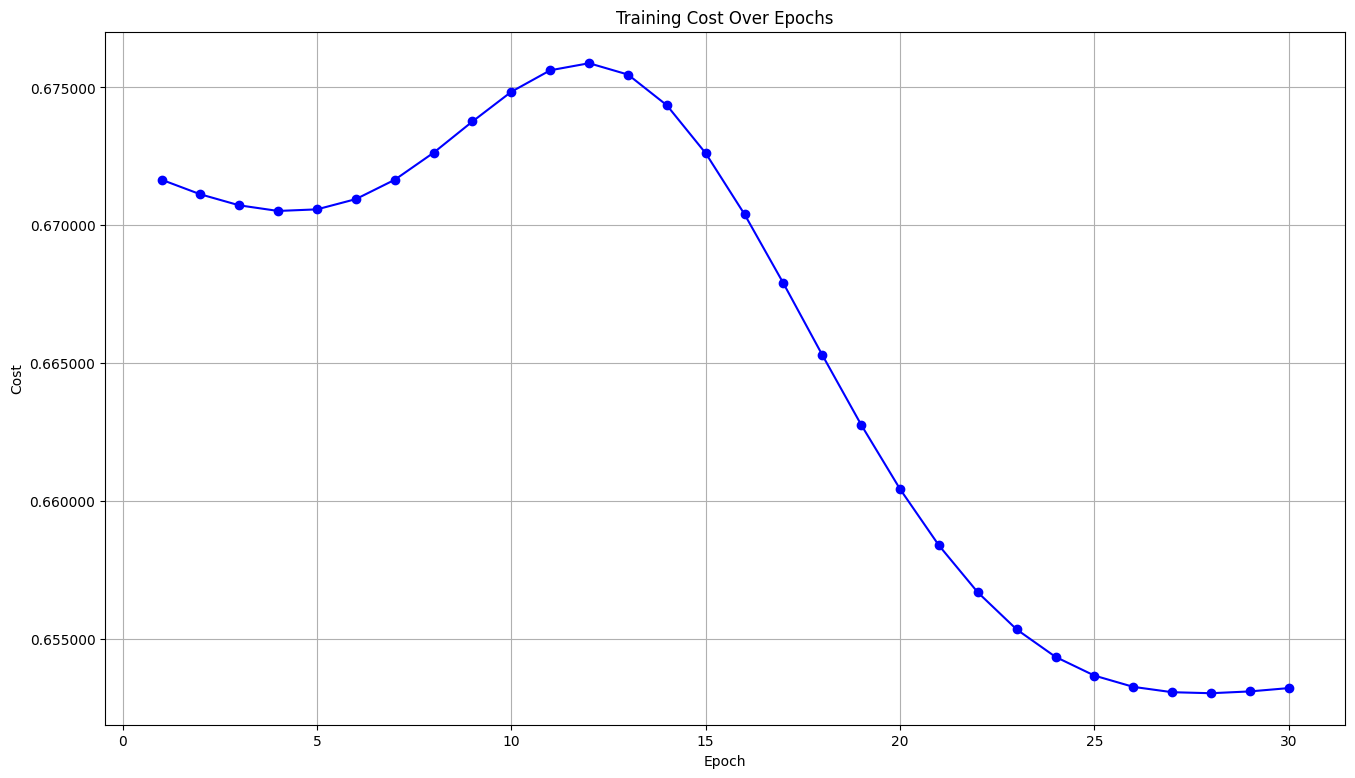

In [2508]:
print("\n===========================TRAINING COSTS===============================")
print(np.array(trainingCosts.copy()).transpose())

plt.figure(figsize=(16, 9))  
plt.plot(range(1, numberOfEpoches + 1), trainingCosts, marker='o', linestyle='-', color='b')  
plt.title('Training Cost Over Epochs')  
plt.xlabel('Epoch') 
plt.ylabel('Cost') 
plt.grid(True)

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))

plt.show()  

Tiếp theo, chúng ta cần so sánh giá trị đầu ra dự đoán (`predictedValues`), và giá trị đầu ra thực tế (`data.encodedYTest`)


=========================PREDICTED VALUES===============================
[[0.2112325  0.39752013 0.39124737]
 [0.21126736 0.39750724 0.39122539]
 [0.21319293 0.39679361 0.39001345]
 [0.21228403 0.39713078 0.39058519]
 [0.21195901 0.39725127 0.39078972]
 [0.21054458 0.39777436 0.39168106]
 [0.21154294 0.3974053  0.39105177]
 [0.20935748 0.39821219 0.39243032]
 [0.21165413 0.39736418 0.39098169]
 [0.21009486 0.39794037 0.39196477]
 [0.2120766  0.39720809 0.39071532]
 [0.21166523 0.39736038 0.39097439]
 [0.21077866 0.3976879  0.39153344]
 [0.21152895 0.39741049 0.39106056]
 [0.21040819 0.39782473 0.39176708]
 [0.21176171 0.39732451 0.39091378]
 [0.21085467 0.39765989 0.39148544]
 [0.21225354 0.39714244 0.39060402]
 [0.20906064 0.3983215  0.39261786]
 [0.21143805 0.39744408 0.39111787]
 [0.21115189 0.39754996 0.39129815]
 [0.21269148 0.39697968 0.39032884]
 [0.2121703  0.3971735  0.39065619]
 [0.21123547 0.39751923 0.3912453 ]
 [0.21094092 0.39762816 0.39143092]
 [0.21111799 0.39756247 0.

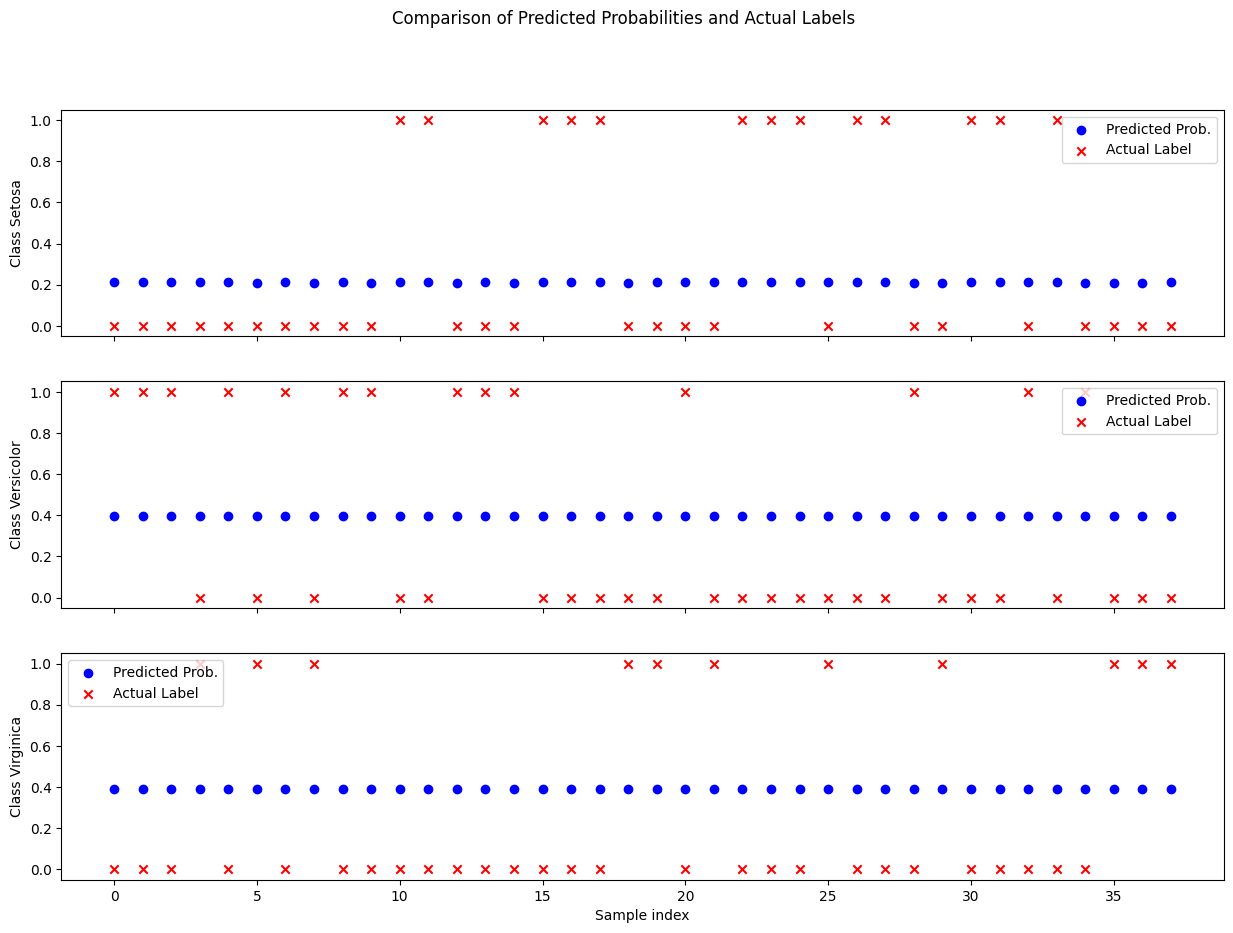

In [2509]:
print("\n=========================PREDICTED VALUES===============================")
print(predictedValues)

numberOfSamples = predictedValues.shape[0]
indices = np.arange(numberOfSamples)

fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
classNames = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    axs[i].scatter(indices, predictedValues[:numberOfSamples, i], color='b', label='Predicted Prob.')
    axs[i].scatter(indices, data.encodedYTest[:numberOfSamples, i], color='r', marker='x', label='Actual Label')
    axs[i].set_ylabel(f'Class {classNames[i]}')
    axs[i].legend()
    
plt.xlabel('Sample index')
plt.suptitle('Comparison of Predicted Probabilities and Actual Labels')
plt.show()

<a name='6'></a>
### 6 - Kết luận

Trong bài này, một mạng lưới thần kinh sâu đã được xây dựng và huấn luyện để giải quyết bài toán phân loại đa lớp của dữ liệu hoa Iris. Mô hình đã đạt được hiệu quả nhất định trong việc nhận diện và phân loại các loại hoa khác nhau, điều này chứng tỏ sức mạnh của học sâu trong việc giải quyết các bài toán phân loại.

Mặc dù vậy, có một số hạn chế cần được khắc phục trong tương lai. Thứ nhất, việc sử dụng Binary Cross Entropy làm hàm mất mát có thể không tối ưu hoàn toàn cho các bài toán phức tạp hơn với nhiều lớp phân loại. Categorical Cross Entropy có thể là một lựa chọn tốt hơn cho các bài toán như vậy. Thứ hai, việc tăng số lượng dữ liệu huấn luyện hoặc sử dụng các kỹ thuật tăng cường dữ liệu có thể giúp cải thiện độ chính xác của mô hình.

Cuối cùng, tương lai của việc áp dụng mạng lưới thần kinh trong lĩnh vực phân loại hình ảnh hứa hẹn nhiều tiềm năng, và những kiến thức này có thể mở rộng để bao gồm các bài toán phức tạp hơn, với các loại dữ liệu đa dạng hơn. Việc nghiên cứu và phát triển các mạng lưới thần kinh sâu tiên tiến hơn sẽ là chìa khóa để khai thác đầy đủ sức mạnh của Trí Tuệ Nhân Tạo.